In [1]:
import numpy as np
import pandas as pd

ser1 = pd.Series(
    data=[120, 380, 250, 360], index=["一季度", "二季度", "三季度", "四季度"]
)
print(ser1)

一季度    120
二季度    380
三季度    250
四季度    360
dtype: int64


In [4]:
ser2 = pd.Series({"一季度": 320, "二季度": 180, "三季度": 300, "四季度": 405})
print(ser2)

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64


In [3]:
ser1 += 10
print(ser1)

一季度    130
二季度    390
三季度    260
四季度    370
dtype: int64


In [5]:
print(ser1 + ser2)

一季度    440
二季度    560
三季度    550
四季度    765
dtype: int64


In [7]:
# 推荐的方式：使用 .iloc 进行位置索引
print(ser1.iloc[2])  # 按位置访问第3个元素（三季度）
print(ser1["三季度"])  # 按标签访问

# 对比不同的访问方式
print("=" * 40)
print("位置索引方式:")
print(f"ser1.iloc[0] = {ser1.iloc[0]} (一季度)")
print(f"ser1.iloc[2] = {ser1.iloc[2]} (三季度)")

print("\n标签索引方式:")
print(f'ser1["一季度"] = {ser1["一季度"]}')
print(f'ser1["三季度"] = {ser1["三季度"]}')

print(f'\nser1.loc["三季度"] = {ser1.loc["三季度"]} (明确使用标签索引)')

250
250
位置索引方式:
ser1.iloc[0] = 120 (一季度)
ser1.iloc[2] = 250 (三季度)

标签索引方式:
ser1["一季度"] = 120
ser1["三季度"] = 250

ser1.loc["三季度"] = 250 (明确使用标签索引)


In [9]:
print(ser2[1:3])
print(ser2["二季度":"四季度"])

二季度    180
三季度    300
dtype: int64
二季度    180
三季度    300
四季度    405
dtype: int64


**提示**：在使用自定义索引进行切片时，结束索引对应的元素也是可以取到的。

In [10]:
ser2[1:3] = 400, 500
print(ser2)

一季度    320
二季度    400
三季度    500
四季度    405
dtype: int64


In [13]:
print(ser2[["二季度", "四季度"]])

二季度    400
四季度    405
dtype: int64


这段代码是使用多个标签来选取 pandas Series 中的元素。

ser2[["二季度", "四季度"]] 会返回一个新的 Series，包含索引为 "二季度" 和 "四季度" 的两个元素及其对应的值。

关键点：
- 使用双重方括号 [[]] 表示传入一个标签列表
- 与单个标签访问 ser2["二季度"] 不同，这会返回一个 Series 而不是单个值
- 结果保持原有的索引-值对应关系

In [15]:
print(ser2 >= 500)
print(ser2[ser2 >= 500])

一季度    False
二季度    False
三季度     True
四季度    False
dtype: bool
三季度    500
dtype: int64


In [21]:
print(ser2.dtype)
print(ser2.hasnans)
print(ser2.index)
print(ser2.values)
print(ser2.is_monotonic_increasing)
print(ser2.is_monotonic_decreasing)
print(ser2.is_unique)

int64
False
Index(['一季度', '二季度', '三季度', '四季度'], dtype='object')
[320 400 500 405]
False
False
True


In [22]:
print(ser2.count())  # 计数
print(ser2.sum())  # 求和
print(ser2.mean())  # 求平均
print(ser2.median())  # 找中位数
print(ser2.max())  # 找最大
print(ser2.min())  # 找最小
print(ser2.std())  # 求标准差
print(ser2.var())  # 求方差

4
1625
406.25
402.5
500
320
73.64045536705125
5422.916666666667


In [23]:
print(ser2.describe())

count      4.000000
mean     406.250000
std       73.640455
min      320.000000
25%      380.000000
50%      402.500000
75%      428.750000
max      500.000000
dtype: float64


In [25]:
ser3 = pd.Series(
    data=["apple", "banana", "apple", "pitaya", "apple", "pitaya", "durian"]
)
print(ser3.value_counts())

apple     3
pitaya    2
banana    1
durian    1
Name: count, dtype: int64


In [26]:
print(ser3.nunique())

4


In [27]:
print(ser3.mode())

0    apple
dtype: object


In [30]:
# 演示 mode() 方法的不同情况

# 情况1：单个众数
ser3_single_mode = pd.Series(["apple", "banana", "apple", "orange", "apple"])
print("单个众数的情况:")
print(f"原数据: {ser3_single_mode.tolist()}")
print(f"众数: {ser3_single_mode.mode()}")
print(f"众数类型: {type(ser3_single_mode.mode())}")
print()

# 情况2：多个众数
ser3_multi_mode = pd.Series(["apple", "banana", "apple", "banana", "orange"])
print("多个众数的情况:")
print(f"原数据: {ser3_multi_mode.tolist()}")
print(f"众数: {ser3_multi_mode.mode()}")
print()

# 情况3：所有值都不重复（没有明显众数）
ser3_no_mode = pd.Series(["apple", "banana", "orange", "grape"])
print("没有明显众数的情况:")
print(f"原数据: {ser3_no_mode.tolist()}")
print(f"众数: \n{ser3_no_mode.mode()}")

单个众数的情况:
原数据: ['apple', 'banana', 'apple', 'orange', 'apple']
众数: 0    apple
dtype: object
众数类型: <class 'pandas.core.series.Series'>

多个众数的情况:
原数据: ['apple', 'banana', 'apple', 'banana', 'orange']
众数: 0     apple
1    banana
dtype: object

没有明显众数的情况:
原数据: ['apple', 'banana', 'orange', 'grape']
众数: 
0     apple
1    banana
2     grape
3    orange
dtype: object


In [31]:
# 如何获取众数的实际值

print("获取众数值的不同方法:")
print("=" * 40)

# 方法1：获取第一个众数值
mode_series = ser3.mode()
first_mode = mode_series.iloc[0] if len(mode_series) > 0 else None
print(f"第一个众数值: {first_mode}")

# 方法2：转换为列表
mode_list = ser3.mode().tolist()
print(f"所有众数值列表: {mode_list}")

# 方法3：直接索引访问
if len(ser3.mode()) > 0:
    mode_value = ser3.mode()[0]
    print(f"众数值（直接索引）: {mode_value}")

print()
print("原始 mode() 输出详解:")
print("=" * 40)
mode_result = ser3.mode()
print(f"完整输出: \n{mode_result}")
print(f"输出类型: {type(mode_result)}")
print(f"输出长度: {len(mode_result)}")
print(f"索引: {mode_result.index.tolist()}")
print(f"值: {mode_result.values.tolist()}")

获取众数值的不同方法:
第一个众数值: apple
所有众数值列表: ['apple']
众数值（直接索引）: apple

原始 mode() 输出详解:
完整输出: 
0    apple
dtype: object
输出类型: <class 'pandas.core.series.Series'>
输出长度: 1
索引: [0]
值: ['apple']


In [2]:
ser4 = pd.Series(data=[10, 20, np.nan, 30, np.nan])
print(ser4)
print("=" * 50)
print(ser4.isna())

0    10.0
1    20.0
2     NaN
3    30.0
4     NaN
dtype: float64
0    False
1    False
2     True
3    False
4     True
dtype: bool


In [6]:
print(ser4.dropna())

0    10.0
1    20.0
3    30.0
dtype: float64
0    10.0
1    20.0
2     NaN
3    30.0
4     NaN
dtype: float64


In [8]:
ser4.fillna(value=55)  # 不会修改原始数据
print(ser4)
print(ser4.fillna(55))  # 也可以
print(ser4.fillna(value=55))  # 也可以

0    10.0
1    20.0
2     NaN
3    30.0
4     NaN
dtype: float64
0    10.0
1    20.0
2    55.0
3    30.0
4    55.0
dtype: float64
0    10.0
1    20.0
2    55.0
3    30.0
4    55.0
dtype: float64


In [9]:
print(ser4.fillna(method="ffill"))  # 用空值前面的非空值填充

0    10.0
1    20.0
2    20.0
3    30.0
4    30.0
dtype: float64


/var/folders/hd/pwqcx5pn30g7jq6160hcf9fr0000gp/T/ipykernel_89914/3178426297.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(ser4.fillna(method="ffill"))  # 用空值前面的非空值填充


#### 这行代码出现了警告：/var/folders/hd/pwqcx5pn30g7jq6160hcf9fr0000gp/T/ipykernel_89914/3178426297.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
这个警告是因为 fillna(method="ffill") 在新版本的 pandas 中被弃用了。

解决方案： 将 fillna(method="ffill") 替换为 ffill()

原因： pandas 简化了 API，将前向填充和后向填充独立为专门的方法：
- fillna(method="ffill") → `ffill()`
- fillna(method="bfill") → `bfill()`

这样更直观且性能更好。

In [10]:
print(ser4.ffill())
print("=" * 50)
print(ser4.bfill())

0    10.0
1    20.0
2    20.0
3    30.0
4    30.0
dtype: float64
0    10.0
1    20.0
2    30.0
3    30.0
4     NaN
dtype: float64


In [17]:
ser5 = pd.Series(range(5))
print(ser5.where(ser5 > 0))
print("=" * 50)
ser5.where(
    ser5 > 0, 24, inplace=True
)  # 很多方法都可以用inplace代表原地操作，inplace这个词的意思就是：原地，True时表示原地操作，即会修改原始数据
print(ser5)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64
0    24
1     1
2     2
3     3
4     4
dtype: int64


### 这个where方法究竟是在干什么？
where 方法的作用是条件筛选和替换：
- 保留条件为True的值：ser5 > 0 为 True 的位置保留原值
- 替换条件为False的值：ser5 > 0 为 False 的位置替换为 NaN（默认）或指定值

在你的代码中：
- ser5 = [0, 1, 2, 3, 4]
- ser5 > 0 → [False, True, True, True, True]
- 结果：[NaN, 1, 2, 3, 4]（索引0的值0被替换为NaN）

语法：Series.where(condition, other=NaN, inplace=False)
- condition：布尔条件
- other：替换值（默认NaN）
- inplace=True：直接修改原数据

这相当于："如果条件成立就保留，否则就替换"

In [23]:
print(ser5.mask(ser5 > 1, 11))

0    11
1     1
2    11
3    11
4    11
dtype: int64


### mask 和 where 的逻辑是相反的：
- where：条件为 True 时保留原值，条件为 False 时替换
- mask：条件为 True 时替换，条件为 False 时保留原值

记忆技巧：
- where = "哪里符合条件就保留哪里"
- mask = "遮罩掉符合条件的地方"

In [27]:
print(ser3)
print(ser3.duplicated())

0     apple
1    banana
2     apple
3    pitaya
4     apple
5    pitaya
6    durian
dtype: object
0    False
1    False
2     True
3    False
4     True
5     True
6    False
dtype: bool


In [28]:
print(ser3.drop_duplicates())

0     apple
1    banana
3    pitaya
6    durian
dtype: object


In [29]:
ser6 = pd.Series(["cat", "dog", np.nan, "rabbit"])
print(ser6)

0       cat
1       dog
2       NaN
3    rabbit
dtype: object


In [35]:
print(ser6.map({"cat": "kitten", "dog": "puppy"}))
print()
print(ser6.map("I am a {}".format))
print()
print(ser6.map("I am a {}".format, na_action="ignore"))

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

0       I am a cat
1       I am a dog
2       I am a nan
3    I am a rabbit
dtype: object

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object


map() 方法的映射逻辑
`ser6.map()` 使用字典进行映射时，只会替换字典中存在的键对应的值：
- "cat" → "kitten" ✅ (字典中有此键)
- "dog" → "puppy" ✅ (字典中有此键)
- np.nan → NaN ❌ (字典中没有此键，保持为NaN)
- "rabbit" → NaN ❌ (字典中没有此键，被替换为NaN)

关键点：当原值在映射字典中找不到对应的键时，pandas会将其替换为NaN，而不是保留原值。

这就是为什么"rabbit"变成了NaN而不是保持为"rabbit"。 

In [36]:
ser7 = pd.Series([20, 21, 12], index=["London", "New York", "Helsinki"])
print(ser7)

London      20
New York    21
Helsinki    12
dtype: int64


In [41]:
print(ser7.apply(np.square))
print()
print(ser7.apply(lambda x: x**2))
print()
ser7.apply(lambda x, value: x - value, args=(5,))

London      400
New York    441
Helsinki    144
dtype: int64

London      400
New York    441
Helsinki    144
dtype: int64



London      15
New York    16
Helsinki     7
dtype: int64

### 这里是在干嘛？为什么 args 被赋值为（5，）？难道是因为这是个元组，只有一个元素所以要用一个逗号？

args=(5,) 中的逗号是为了创建一个单元素元组。

原因分析：

- Python 元组语法：(5) 只是括号包围的整数，不是元组；(5,) 才是包含一个元素的元组
- pandas apply() 参数传递：args 参数期望接收一个可迭代对象（如元组、列表），用于传递给 lambda 函数的额外参数

错误原因：如果写成 args=(5)，pandas 会尝试解包整数 5，导致 `TypeError: Value after * must be an iterable, not int`

```python
ser7.apply(lambda x, value: x - value, args=(5,))  # ✅ 正确
# 等价于：
ser7.apply(lambda x, value: x - value, args=[5])   # ✅ 也正确
```

这样 value 参数就会接收到 5，实现每个元素减去 5 的操作。


In [43]:
ser8 = pd.Series(
    data=[35, 96, 12, 57, 25, 89],
    index=["grape", "banana", "pitaya", "apple", "peach", "orange"],
)
print(ser8.sort_values())  # 按值从小到大排序
print()
print(ser8.sort_index())  # 按索引从大到小排序˝

pitaya    12
peach     25
grape     35
apple     57
orange    89
banana    96
dtype: int64

apple     57
banana    96
grape     35
orange    89
peach     25
pitaya    12
dtype: int64


In [44]:
print(ser8.nlargest(3))  # 值最大的3个
print()
print(ser8.nsmallest(3))  # 值最小的2个

banana    96
orange    89
apple     57
dtype: int64

pitaya    12
peach     25
grape     35
dtype: int64


/var/folders/hd/pwqcx5pn30g7jq6160hcf9fr0000gp/T/ipykernel_89914/4041392412.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ser9[i] + 15, ser9[i], ha="center")  # 在每个柱子顶部添加数值标签


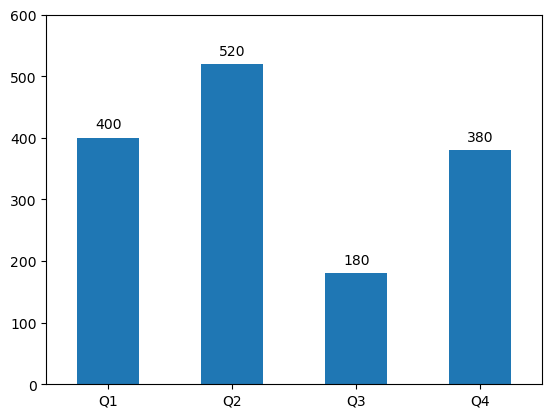

In [53]:
import matplotlib.pyplot as plt

ser9 = pd.Series({"Q1": 400, "Q2": 520, "Q3": 180, "Q4": 380})
ser9.plot(kind="bar")  # 绘制条形图
plt.ylim(0, 600)  # 设置y轴范围为0-600
plt.xticks(rotation=0)  #  设置x轴标签不旋转（水平显示）
for i in range(ser9.size):
    plt.text(i, ser9[i] + 15, ser9[i], ha="center")  # 在每个柱子顶部添加数值标签
plt.show()

### 警告解释
问题原因：ser9[i] 使用整数索引访问Series，pandas将在未来版本中禁用这种位置访问方式。

解决方案：将第7行改为：

`plt.text(i, ser9.iloc[i] + 5, ser9.iloc[i], ha="center")`

使用 .iloc[i] 明确表示按位置访问，而不是按标签访问，避免了歧义和警告。

iloc = integer location，表示"整数位置"访问器。

## plt.text() 方法详解

`plt.text()` 函数用于在图表中添加文本标签。

### 基本语法
```python
plt.text(x, y, s, **kwargs)
```

### 参数说明
- **x, y**: 文本的坐标位置
- **s**: 要显示的文本内容
- **ha**: 水平对齐方式 (horizontal alignment)
  - `"left"`: 左对齐
  - `"center"`: 居中对齐 
  - `"right"`: 右对齐
- **va**: 垂直对齐方式 (vertical alignment)
  - `"top"`: 顶部对齐
  - `"center"`: 居中对齐
  - `"bottom"`: 底部对齐

### 在上面的代码中：
```python
plt.text(i, ser9[i] + 5, ser9[i], ha="center")
```
- `i`: x坐标，对应柱子的位置 (0,1,2,3)
- `ser9[i] + 5`: y坐标，柱子高度+5像素的偏移
- `ser9[i]`: 显示的文本内容，即柱子的数值
- `ha="center"`: 文本以x坐标为中心对齐

这样就在每个柱子顶部显示了对应的数值。


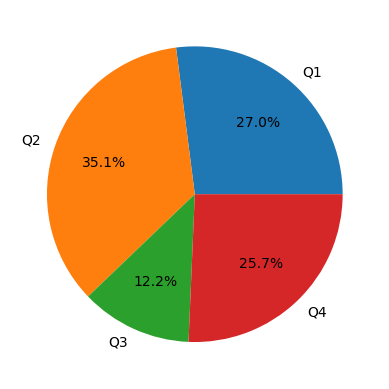

In [54]:
ser9.plot(kind="pie", autopct="%.1f%%", pctdistance=0.65)
plt.show()

这行代码创建饼图并显示百分比标签：
- kind="pie": 指定绘制饼图类型
- autopct="%.1f%%": 格式化字符串，用于显示百分比
    - % 开头：表示这是格式化占位符
    - .1f：浮点数保留1位小数
    - %%：两个%表示输出一个字面量%符号（因为单个%在格式化中有特殊含义，所以需要转义）
    - 最终效果：显示如"25.3%"这样的百分比
- pctdistance=0.65: 百分比标签距离饼图中心的相对距离，0.65表示在半径的65%处显示，避免标签太靠近中心或边缘影响可读性

两个%%是因为格式化语法需要用%%来输出单个%字符。